#  EDA visualization and training model by given attributes

In [2]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [3]:
import warnings
warnings.filterwarnings("ignore") 

In [4]:
data = p.read_csv('news_dataset.csv')
df = data.dropna()

In [5]:
df.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [6]:
df.columns

Index(['label', 'text'], dtype='object')

In [7]:
df.label.unique()

array(['REAL', 'FAKE'], dtype=object)

In [8]:
df.text.unique()

array(['Payal has accused filmmaker Anurag Kashyap of behaving inappropriately with her in a video that went viral. She maintained her stance while speaking to ETimes and said, “I have wanted to speak about this for a long time. But today, finally I thought I must get it off my head. I had tweeted about my incident sometime ago when the #MeToo movement had happened, but many people told me to delete the tweet else I would stop getting work. My manager too advised me to remove the tweet. I complied. Post that, Anurag blocked me on WhatsApp.”',
       'A four-minute-long video of a woman criticising the government at an anti-Citizenship Amendment Act rally in Delhi earlier in January is going viral with a false claim that the woman shows late Prime Minister Atal Bihari Vajpayee\'s niece.\n\nThe caption in Hindi translates to: " Respected Vajpayee ji\'s niece has finally broken her silence, listen to what she has to say."\n\n\n\n(Translated from Hindi: माननीय वाजपयी जी की भतीजी ने आखिरकार

In [9]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
FAKE   1871   1851  Our website is made possible by displaying onl...   19
REAL   1850    378  Highest IPL score in Dubai\n\nMilestones to wa...   79

Text(0.5, 1.0, 'Distribution of label ')

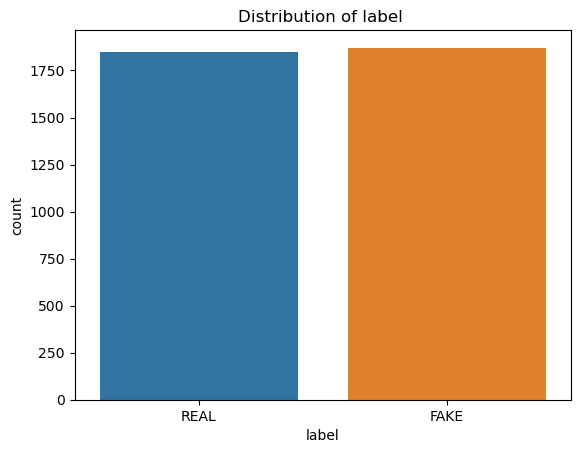

In [10]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "label", data = df)
df.loc[:, 'label'].value_counts()
plt.title('Distribution of label ')

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
#df['label']=df['label'].str.strip()
df['text']=df['text'].str.strip()
# lowercase the text
#df['label'] = df['label'].str.lower()
df['text'] = df['text'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
#df['label']=df['label'].apply(lambda x: x.translate(table))
df['text']=df['text'].apply(lambda x: x.translate(table))
# tokenizing each message
#df['word_tokens']=df.apply(lambda x: x['text'].split(' '),axis=1)
df['word_tokens']=df.apply(lambda x: x['text'].split(' '),axis=1)
# removing stopwords
df['text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\SAGAYAMANI/nltk_data'
    - 'C:\\Users\\SAGAYAMANI\\anaconda3\\nltk_data'
    - 'C:\\Users\\SAGAYAMANI\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\SAGAYAMANI\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\SAGAYAMANI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in df['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1
    
print(vocab)

In [ ]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'text':],df['label'],test_size=0.2)

In [ ]:
y

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y=='fake','final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y=='real','final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

